# 딥러닝 기초 개념


[딥러닝 기초]
https://seungbeomdo.tistory.com/38

[오차역전파 쉬운 강의]
https://www.youtube.com/watch?v=1Q_etC_GHHk

# Feedforward Neural Network 순방향 신경망

순방향 신경망은 다층 퍼셉트론의 다른 이름으로 인공 신경망 모델 중 가장 기본이 되는 모델이다.

다층 퍼셉트론은 여러 층 쌓은 순방향의 인공 신경망이라 하며, 순방향 신경망이라고도 한다.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001



# CUDA 개념





CUDA는 NVIDIA GPU에서 병렬 연산을 수행할 수 있도록 제공하는 플랫폼이다.

- torch.device는 **텐서**나 **모델**을 어느 장치(CPU/GPU)에 올릴지 지정해주는 역할을 한다.

- torch.cuda.is_available()은 CUDA 사용 가능 여부를 확인하는 함수이다.

# device를 사용 하는 이유


1. 장치에 따라 동적으로 가능
 - GPU가 있으면 자동으로 GPU 사용, 없으면 CPU로 변경해서 코드를 짤 때 편리하다.

2. 모델과 데이터를 GPU로 보내기 위해 필요하다.
 - model.to(device)나 tensor.to(device)를 서야 모델과 데이터를 GPU로 보낼 수 있다.

In [ ]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)


test_dataset = torchvision.datasets.MNIST(root='../data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



100%|██████████| 9.91M/9.91M [00:01<00:00, 6.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.59MB/s]


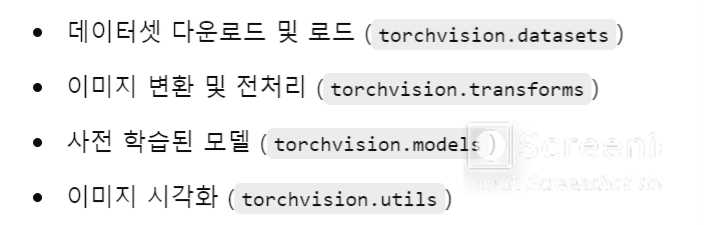

# Transform.ToTensor()

- torchvision에서 제공하는 데이터셋(CIFAR-10,MNIST)는 기본적으로 **PIL이미지** 또는 **Numpy 배열** 형태로 제공된다.


- 그래서 pytorch 모델에 데이터를 넣으려면 Tensor형태로 변환해줘야 한다.
이걸 자동으로 해주는 게 바로 transform.ToTensor()이다.

- PIL 이미지는 (Height, Weight, Channel) 형태이다. 그래서 (Channel, Height, Weight) 형태로 바꿔준다.


In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # 모델의 구조들만 정의 한다.
        super(NeuralNet, self).__init__() # 부모 클래스 NeuralNet을 self 인스턴스에 적용한다.
        self.fc1 = nn.Linear(input_size, hidden_size) # 인스턴스의 속성들 정의
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x): # 데이터가 모델을 통과할 때의 동작(순전파)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)




---


# 클래스와 인스턴스 개념 (Remind)

- 클래스는 객체의 설계도

  ex) NeuralNet

- 인스턴스는 그 설계도를 바탕으로 실제로 만들어진 구체적인 객체

  ex) model

# 클래스의 인스턴스 (Remind)

- 그 클래스를 바탕으로 만들어질 객체의 속성(변수)와 동작(메서드)를 정의 할 수 있도록 해주는 실체이다.

- ex) self

---



# nn.Module




모든 신경망의 부모 클래스이다. 신경망을 만들 때 필요한 여러 기능을 제공한다.
하지만 틀을 제공하는 것이지 모델의 구조와 순전파는 정의해줘야 한다.

nn.Module 안에는


1. __init__() -> 함수 안에 레이어와 파라미터를 관리하도록 자동으로 정의 되어
있어서 super()를 통해 호출된다. 부모 클래스(nn.module)의 __init__()을 실행해야 nn.Module의 기능을 사용할 수 있다.

2. foward() -> 모델을 사용할 때, 자동으로 호출된다.

3. parameters()

4. to(device)

5. state_dict()



# init은 super()하고, forward는 super()하지 않는 이유

- 부모클래스(nn.Module)의 __init__()메서드는 모델의 모든 레이어나 파라미터들을 관리하고, 기본 설정들을 처리해주기 때문에 super()를 통해서 실행 되어야 한다.

- 그러나 forward는 모델의 구조에 따라 다양한 구현이 가능하기 때문에, 부모 클래스의 nn.module에서 기본 적으로 구현되어 있지 않다.

In [ ]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward() # 기울기를 계산
        optimizer.step() # 1 step gradient descent(경사하강)

        if (batch_idx+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, batch_idx+1, total_step, loss.item()))



Epoch [1/5], Step [100/600], Loss: 0.4456
Epoch [1/5], Step [200/600], Loss: 0.3073
Epoch [1/5], Step [300/600], Loss: 0.2362
Epoch [1/5], Step [400/600], Loss: 0.1966
Epoch [1/5], Step [500/600], Loss: 0.0815
Epoch [1/5], Step [600/600], Loss: 0.2255
Epoch [2/5], Step [100/600], Loss: 0.1659
Epoch [2/5], Step [200/600], Loss: 0.0685
Epoch [2/5], Step [300/600], Loss: 0.1803
Epoch [2/5], Step [400/600], Loss: 0.1412
Epoch [2/5], Step [500/600], Loss: 0.0445
Epoch [2/5], Step [600/600], Loss: 0.1688
Epoch [3/5], Step [100/600], Loss: 0.0866
Epoch [3/5], Step [200/600], Loss: 0.0467
Epoch [3/5], Step [300/600], Loss: 0.0795
Epoch [3/5], Step [400/600], Loss: 0.0329
Epoch [3/5], Step [500/600], Loss: 0.1301
Epoch [3/5], Step [600/600], Loss: 0.0748
Epoch [4/5], Step [100/600], Loss: 0.2015
Epoch [4/5], Step [200/600], Loss: 0.0137
Epoch [4/5], Step [300/600], Loss: 0.0566
Epoch [4/5], Step [400/600], Loss: 0.1067
Epoch [4/5], Step [500/600], Loss: 0.0495
Epoch [4/5], Step [600/600], Loss:

# enumerate의 기능(Remind)



---


Remind
*enumerate는 반복문에서 인덱스와 원소를 동시에 가져오는 기능을 가지고 있다.


---

위 코드에서는 enumerate를 통해서 train_loader에 있는 배치(batch)들을 하나씩 꺼내면서, 그에 대한 인덱스를 함께 제공한다.







# DataLoader가 하는 일



torch.utils.data.DataLoader는 자동으로 데이터셋을 모델에 넣기 좋은 형태로 정리해서 제공해준다.

Images와 labels 값이 들어갈 수 있는 이유
1. DataLoader는 Dataset 객체를 사용해서 데이터를 가져온다.
2. Dataset 객체는 __getitem__() 메소드를 통해 한 개의 데이터와 레이블을 반환 할 수 있다.
3. DataLoader는 이를 여러 개(batch)로 묶어서 반환해준다.



---

# image를 왜 (-1, 28*28)로 바꾸는 걸까 ?



image는 일반적으로 [batch 사이즈, 채널 수, 높이, 너비] 형태를 가진다.

  - ex) image.shape = (batch_size, 1, 28, 28)


그런데 신경망의 Fully connected layer는 1차원 벡터(평탄화된 형태)를 입력으로 받는다.

따라서, (batch_size,1,28,28) 형태를 (batch_size,784)로 변환해야 한다.





# -1은 뭘까 ?


여기서 -1의 의미는 자동으로 크기를 맞추라는 의미이다. batch_size에 따라서 자동으로 새로운 메모리를 할당할 수도 있다.



# 왜 모델 클래스 "안에서" forward에서 하지 않고, 모델 "밖에서" 할까 ?



훈련할 때는 꼭 28*28 이미지만 쓰는 게 아니다. 때로는 다른 크기의 이미지를 사용할 수도 있다.

데이터 변환 작업을 모델 밖에서 해 두면, 다른 형태의 데이터를 넣을 때도 모델을 바꿀 필요가 없고 데이터 전처리를 조정하는 것만으로 다양한 시도를 할 수 있다.

그러므로 DataLoader 단계에서 처리하는 것이 일반적이다.

# Optimizer.zero_grad(기울기 초기화)를 해야하는 이유



- Pytorch에서 역전파(backward) 기울기를 계산하고 나면 각 파라미터에 대해 기울기(gradient)가 누적되는 방식을 사용한다.

- 즉, loss.backward()를 호출 할 때마다 기존 기울기에 새로운 기울기를 계속 더해준다.

- 그래서 반복적인 학습 과정에서 기울기를 초기화하지 않으면, 이전 배치의 기울기가 계속 쌓여서 잘못된 값을 얻게 된다.

# 왜 자동으로 초기화되게 하면 안될까 ?



- 큰 모델을 훈련할 때, 한 번에 처리할 수 있는 배치 크기가 제한적이다.

- 그래서 여러 개의 작은 배치를 통해서 기울기를 누적하고, 일정 횟수만큼 누적된 후에야 한 번만 optimizer.step()을 호출 한다.

- 이렇게 하면, 더 큰 배치로 학습한 효과를 얻을 수 있다.

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) # 각 행의 최댓값 인덱스를 뽑아낸다.
        total += labels.size(0) # batch size = 100 100씩 오를 것
        correct += (predicted == labels).sum().item()
        # 1. 각 행의 최댓값이 나온 애들 중에서 label과 일치하는지를 비교
        # 2. 각 예측이 정답인지 아닌지 True/False로 비교한다.
        # 3. .sum()을 쓰면 True = 1. False = 0으로 처리되서, 맞춘 개수가 나온다.
        # 4. 다 합친 개수를 item() 함수를 통해 숫자로 변환해준다.

        # * item은 텐서에서 스칼라 값을 가져오는 것 * item은 텐서가 하나의 값만 가지고 있을때 사용할 수 있다.

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 97.95 %


# with torch.no_grad()

- torch.no_grad() : Pytorch에서는 기본적으로 텐서 연산을 추적해서 기울기를 계산합니다. 그러나 추론(inference) 시에는 기울기를 계산할 필요가 없다.

- with : 블록 내에서는 기울기를 추적하지 않는다


# Torch.max







- torch.max(tensor, dim)는 텐서에서 가장 큰 값을 찾고, 그 값과 그 값의 인덱스를 반환하는 함수이다.

- dim = 1(가로 방향으로)은 배치 내에서 가장 높은 확률을 가진 클래스의 인덱스를 가지고 있다.

- predict에는 가장 높은 값을 가진 라벨 값이 저장된다.

예를 들어,

---


outputs = torch.tensor([[0.1, 0.3, 0.6],
                        [0.8, 0.1, 0.1]])

_, predicted = torch.max(outputs, 1)

-> tensor([2,0])이 들어간다.


---

- 첫번째 샘플에서 **0.6**이 가장 크니까 클래스 **2**
- 두번째 샘플에서 **0.8**이 가장 크니까 클래스 **0**




# '_'는 뭘까 ?



torch.max()는 두 개의 값을 반환한다.

1) **최댓값**

2) **최댓값의 인덱스**

**최댓값만** 필요 또는 **인덱스만** 필요할 때 이렇게 사용한다.



# outputs.data 값은 왜 0과 1 사이에 값을 가질까 ?



- 모델이 예측한 값은 보통 소프트 맥스(softmax) 함수를 거친 값이기 때문이다.

- nn.CrossEntropyLoss()는 내부적으로 소프트 맥스를 자동으로 적용해준다.

- *Logits는 소트프 맥스를 거치지 않은 출력을 말한다.